In [ ]:
#Mount the drive

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
#Install the necessary library

In [2]:
!pip install hdbscan

     |████████████████████████████████| 6.4 MB 7.0 MB/s 
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
    Preparing wheel metadata ... done
  Created wheel for hdbscan: filename=hdbscan-0.8.27-cp37-cp37m-linux_x86_64.whl size=2311953 sha256=ec96d25031d026efb48750307d6fccf3b9a7bd91f867940e78dc76006c9042fe
  Stored in directory: /root/.cache/pip/wheels/73/5f/2f/9a259b84003b84847c259779206acecabb25ab56f1506ee72b
Successfully built hdbscan


In [3]:
import numpy as np
import pandas as pd
import seaborn as sns
import hdbscan
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.cluster import DBSCAN, KMeans, AgglomerativeClustering
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from sklearn.metrics import silhouette_score
from sklearn.pipeline import Pipeline

In [ ]:
#Read the csv file and create the dataframe

In [4]:
df = pd.read_csv('/content/drive/MyDrive/ML/cards.csv')
df.head()


,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,C10001,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,C10002,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,C10003,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,C10004,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,NaN,0.000000,12
4,C10005,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12


In [ ]:
# Findout the missing values

In [5]:
df.isnull().sum()

CUST_ID                               0
BALANCE                               0
BALANCE_FREQUENCY                     0
PURCHASES                             0
ONEOFF_PURCHASES                      0
INSTALLMENTS_PURCHASES                0
CASH_ADVANCE                          0
PURCHASES_FREQUENCY                   0
ONEOFF_PURCHASES_FREQUENCY            0
PURCHASES_INSTALLMENTS_FREQUENCY      0
CASH_ADVANCE_FREQUENCY                0
CASH_ADVANCE_TRX                      0
PURCHASES_TRX                         0
CREDIT_LIMIT                          1
PAYMENTS                              0
MINIMUM_PAYMENTS                    313
PRC_FULL_PAYMENT                      0
TENURE                                0
dtype: int64

In [ ]:
# shape of the column

In [6]:
df.shape

(8950, 18)

In [ ]:
# columns name list

In [7]:
df.columns

Index(['CUST_ID', 'BALANCE', 'BALANCE_FREQUENCY', 'PURCHASES',
       'ONEOFF_PURCHASES', 'INSTALLMENTS_PURCHASES', 'CASH_ADVANCE',
       'PURCHASES_FREQUENCY', 'ONEOFF_PURCHASES_FREQUENCY',
       'PURCHASES_INSTALLMENTS_FREQUENCY', 'CASH_ADVANCE_FREQUENCY',
       'CASH_ADVANCE_TRX', 'PURCHASES_TRX', 'CREDIT_LIMIT', 'PAYMENTS',
       'MINIMUM_PAYMENTS', 'PRC_FULL_PAYMENT', 'TENURE'],
      dtype='object')

In [ ]:
correlation values between numerical columns

In [8]:
df.corr()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
BALANCE,1.000000,0.322412,0.181261,0.164350,0.126469,0.496692,-0.077944,0.073166,-0.063186,0.449218,0.385152,0.154338,0.531283,0.322802,0.398684,-0.318959,0.072692
BALANCE_FREQUENCY,0.322412,1.000000,0.133674,0.104323,0.124292,0.099388,0.229715,0.202415,0.176079,0.191873,0.141555,0.189626,0.095843,0.065008,0.132569,-0.095082,0.119776
PURCHASES,0.181261,0.133674,1.000000,0.916845,0.679896,-0.051474,0.393017,0.498430,0.315567,-0.120143,-0.067175,0.689561,0.356963,0.603264,0.093860,0.180379,0.086288
ONEOFF_PURCHASES,0.164350,0.104323,0.916845,1.000000,0.330622,-0.031326,0.264937,0.524891,0.127729,-0.082628,-0.046212,0.545523,0.319724,0.567292,0.048755,0.132763,0.064150
INSTALLMENTS_PURCHASES,0.126469,0.124292,0.679896,0.330622,1.000000,-0.064244,0.442418,0.214042,0.511351,-0.132318,-0.073999,0.628108,0.256499,0.384084,0.132172,0.182569,0.086143
CASH_ADVANCE,0.496692,0.099388,-0.051474,-0.031326,-0.064244,1.000000,-0.215507,-0.086754,-0.177070,0.628522,0.656498,-0.075850,0.303985,0.453238,0.140107,-0.152935,-0.068312
PURCHASES_FREQUENCY,-0.077944,0.229715,0.393017,0.264937,0.442418,-0.215507,1.000000,0.501343,0.862934,-0.308478,-0.203478,0.568430,0.119788,0.103464,0.003030,0.305802,0.061506
ONEOFF_PURCHASES_FREQUENCY,0.073166,0.202415,0.498430,0.524891,0.214042,-0.086754,0.501343,1.000000,0.142329,-0.111716,-0.069088,0.544869,0.295038,0.243537,-0.030327,0.157531,0.082466
PURCHASES_INSTALLMENTS_FREQUENCY,-0.063186,0.176079,0.315567,0.127729,0.511351,-0.177070,0.862934,0.142329,1.000000,-0.262958,-0.169207,0.529975,0.060755,0.085551,0.030073,0.250087,0.073275
CASH_ADVANCE_FREQUENCY,0.449218,0.191873,-0.120143,-0.082628,-0.132318,0.628522,-0.308478,-0.111716,-0.262958,1.000000,0.799561,-0.131168,0.132616,0.183192,0.098838,-0.249773,-0.133372


In [ ]:
visualization of correlation plot

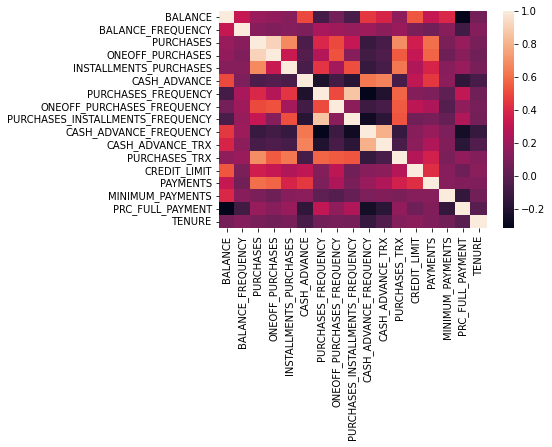

In [9]:
sns.heatmap(df.corr())
plt.show()

In [23]:
missing_col = ['CREDIT_LIMIT','MINIMUM_PAYMENTS']
for i in missing_col:
    df.loc[df.loc[:,i].isnull(),i]=df.loc[:,i].mean()

/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [24]:
df1 = df
from sklearn.preprocessing import StandardScaler
std_scaler = StandardScaler()
scale_columns =['BALANCE', 'BALANCE_FREQUENCY', 'CASH_ADVANCE','CASH_ADVANCE_FREQUENCY','CASH_ADVANCE_TRX','CREDIT_LIMIT', 'PAYMENTS','MINIMUM_PAYMENTS']
df1[scale_columns] = std_scaler.fit_transform(df[scale_columns])
df1.head()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """
/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:3076: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.iloc._setitem_with_indexer((slice(None), indexer), value)
/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:3041: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-vi

,BALANCE,BALANCE_FREQUENCY,CASH_ADVANCE,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS
0,-0.731989,-0.249434,-0.466786,-0.675349,-0.476070,-0.960433,-0.528979,-3.109675e-01
1,0.786961,0.134325,2.605605,0.573963,0.110074,0.688639,0.818642,8.931021e-02
2,0.447135,0.518084,-0.466786,-0.675349,-0.476070,0.826062,-0.383805,-1.016632e-01
3,0.049099,-1.016953,-0.368653,-0.258913,-0.329534,0.826062,-0.598688,-5.900237e-17
4,-0.358775,0.518084,-0.466786,-0.675349,-0.476070,-0.905464,-0.364368,-2.657913e-01


In [ ]:
#kmeans algorithm

In [25]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
df = df1[scale_columns]
kmeans = KMeans(n_clusters=4).fit(df)
centroids = kmeans.cluster_centers_
labels = kmeans.labels_
print(centroids)
print(labels)
print('Attributes used for cluster model: ', scale_columns)

[[ 1.15161898  0.37442086  1.87496017  2.11823995  2.01758792  0.61576847
   0.69018571  0.25592323]
 [-0.29638561  0.38247481 -0.28349934 -0.24930142 -0.25027431 -0.3245775
  -0.21590455 -0.14656724]
 [ 1.37750616  0.40360337  0.14242616 -0.03796841 -0.09902796  1.43666746
   0.81114029  0.85841337]
 [-0.69322774 -2.09257061 -0.30404848 -0.47241978 -0.35073888 -0.24948706
  -0.25240162 -0.2582866 ]]
[1 0 1 ... 1 1 1]
Attributes used for cluster model:  ['BALANCE', 'BALANCE_FREQUENCY', 'CASH_ADVANCE', 'CASH_ADVANCE_FREQUENCY', 'CASH_ADVANCE_TRX', 'CREDIT_LIMIT', 'PAYMENTS', 'MINIMUM_PAYMENTS']


In [ ]:
# silhoutte score

For n_clusters = 4 The average silhouette_score is : 0.3458608734976961
For n_clusters = 5 The average silhouette_score is : 0.34409441283273273
For n_clusters = 6 The average silhouette_score is : 0.3498988290880023
For n_clusters = 7 The average silhouette_score is : 0.3356213763525628
For n_clusters = 8 The average silhouette_score is : 0.3145702299832557
For n_clusters = 9 The average silhouette_score is : 0.3103474879659666
For n_clusters = 10 The average silhouette_score is : 0.3127826043033967


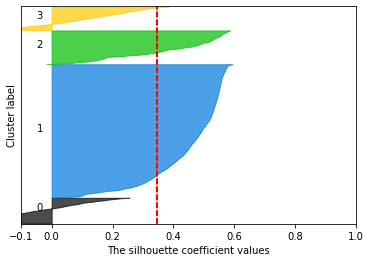

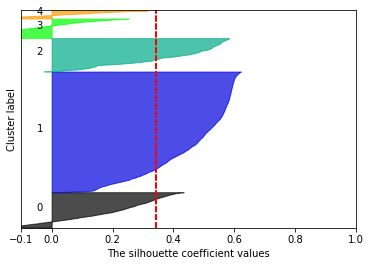

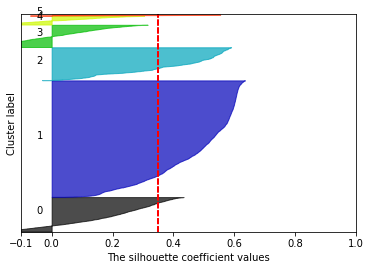

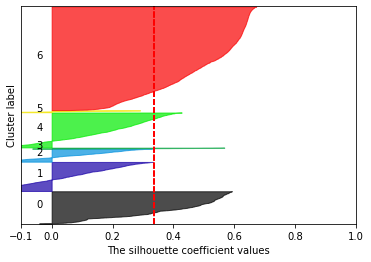

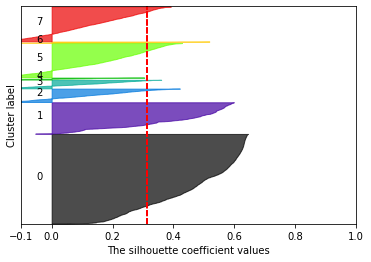

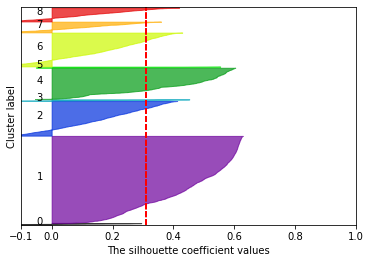

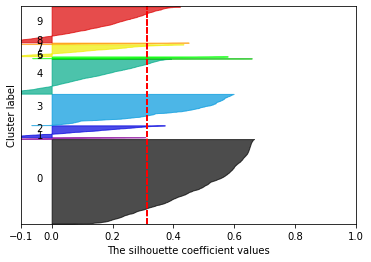

In [27]:
from sklearn.metrics import silhouette_samples, silhouette_score
import matplotlib.cm as cm
df=df1[scale_columns]
range_n_clusters = [ 4, 5, 6,7,8,9,10]
for n_clusters in range_n_clusters:
# Create a subplot with 1 row and 2 columns
  fig, ax1 = plt.subplots(1, 1)
  ax1.set_xlim([-0.1, 1])
  ax1.set_ylim([0, len(df) + (n_clusters + 1) * 10])
  clusterer = KMeans(n_clusters=n_clusters, random_state=10)
  cluster_labels = clusterer.fit_predict(df)
  silhouette_avg = silhouette_score(df, cluster_labels)
  print("For n_clusters =", n_clusters, "The average silhouette_score is :", silhouette_avg)
# Compute the silhouette scores for each sample
  sample_silhouette_values = silhouette_samples(df, cluster_labels)
  y_lower = 10
  for i in range(n_clusters):
    ith_cluster_silhouette_values = sample_silhouette_values[cluster_labels == i]
    ith_cluster_silhouette_values.sort()
    size_cluster_i = ith_cluster_silhouette_values.shape[0]
    y_upper = y_lower + size_cluster_i
    color = cm.nipy_spectral(float(i) / n_clusters)
    ax1.fill_betweenx(np.arange(y_lower, y_upper), 0, ith_cluster_silhouette_values, facecolor=color, edgecolor=color, alpha=0.7)
 # Label the silhouette plots with their cluster numbers at the middle
    ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))
 # Compute the new y_lower for next plot
    y_lower = y_upper + 10 # 10 for the 0 samples
    ax1.set_xlabel("The silhouette coefficient values")
    ax1.set_ylabel("Cluster label")
# The vertical line for average silhouette score of all the values
    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")
    ax1.set_yticks([]) # Clear the yaxis labels / ticks
    ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])
plt.show()

In [ ]:
# this is the information of my numerical columns

In [28]:
df.describe()

,BALANCE,BALANCE_FREQUENCY,CASH_ADVANCE,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS
count,8.950000e+03,8.950000e+03,8.950000e+03,8.950000e+03,8.950000e+03,8.950000e+03,8.950000e+03,8.950000e+03
mean,4.195651e-16,1.207388e-14,5.693056e-15,5.985653e-16,-7.151759e-16,-5.143905e-15,-2.746158e-16,-7.314447e-17
std,1.000056e+00,1.000056e+00,1.000056e+00,1.000056e+00,1.000056e+00,1.000056e+00,1.000056e+00,1.000056e+00
min,-7.516398e-01,-3.703271e+00,-4.667856e-01,-6.753489e-01,-4.760698e-01,-1.221536e+00,-5.986883e-01,-3.708230e-01
25%,-6.900078e-01,4.904486e-02,-4.667856e-01,-6.753489e-01,-4.760698e-01,-7.955261e-01,-4.662913e-01,-2.975162e-01
50%,-3.320286e-01,5.180838e-01,-4.667856e-01,-6.753489e-01,-4.760698e-01,-4.107426e-01,-3.026846e-01,-2.268130e-01
75%,2.352559e-01,5.180838e-01,6.435242e-02,4.351492e-01,1.100739e-01,5.512163e-01,5.802976e-02,-5.900237e-17
max,8.397489e+00,5.180838e-01,2.201112e+01,6.820521e+00,1.754785e+01,7.010083e+00,1.692228e+01,3.241509e+01


In [ ]:
#Without Dimension reduction technique using pipepline process

In [ ]:
#Build Pipeline in Machine Learning Process

In [29]:
#Define method for data exploration from the source
def data_exploration(path):
  df = pd.read_csv('/content/drive/MyDrive/ML/cards.csv') 
  df.head()
  return df

In [30]:
def missing_values(attributes):
  missing_col = df[attributes].copy()
  for i in missing_col:
    df.loc[df.loc[:,i].isnull(),i]=df.loc[:,i].mean()
  return missing_col,attributes

In [31]:
def data_preparation(attributes):
   
    X= df[attributes].copy()
    X.columns =['BALANCE', 'BALANCE_FREQUENCY', 'CASH_ADVANCE','CASH_ADVANCE_FREQUENCY','CASH_ADVANCE_TRX','CREDIT_LIMIT', 'PAYMENTS','MINIMUM_PAYMENTS']
    X.astype(float).head()
    return X,attributes

In [32]:
#Define method for data scaling
def data_scaling(X,scale,attributes):
  if scale=='minmax':
    scaler=MinMaxScaler()
  else:
    scaler=StandardScaler()
  scaled_values = scaler.fit_transform(X[attributes])
  return scaled_values

In [33]:
#Define method for data visualization
def data_visualization(X,attributes):
  plt.scatter(X[attributes[0]], X[attributes[5]])
  plt.show()

In [52]:
#Define method for model building

def build_model(model,min_samples,eps, scaled_values):
  if model=='DBSCAN':
    cluster = DBSCAN( eps=eps, min_samples=min_samples).fit_predict( scaled_values)
    #print(cluster)
  else:
    cluster = hdbscan.HDBSCAN(min_samples=min_samples).fit_predict( scaled_values)
    #print(cluster)
  return cluster

In [53]:
#Define method to visualize the clusters
def visualize_clusters(X, attributes, model,cluster):
 if model=='DBSCAN':
  plt.scatter(X[attributes[0]], X[attributes[5]],c=cluster, cmap='Paired')
  plt.title("DBSCAN")
  plt.show()
 else:
  plt.scatter(X[attributes[0]], X[attributes[5]],c=cluster, cmap='Paired')
  plt.title("HDBSCAN")
  plt.show()

In [54]:
#define the method to construct pipeline

def build_pipeline(path,attributes, scale, components, model,eps,min_samples):
 #Step 1
    df=data_exploration(path)
 #Step 2
    missing_values(attributes)

    X,attributes=data_preparation(attributes)
 
 #Step 3
    scaled_values=data_scaling(X,scale,attributes)
 
 #Step 4
    data_visualization(X,attributes)
 
 #Step 5
    #values=feature_reduction(scaled_values, dimension_reduction, components)
 
 #Step 6
    cluster=build_model(model,min_samples,eps,scaled_values)
 
 #Step 7
    visualize_clusters(X, attributes, model,cluster)

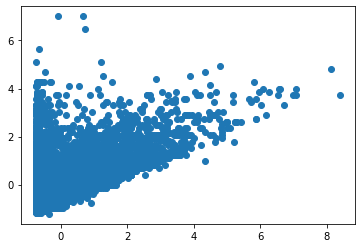

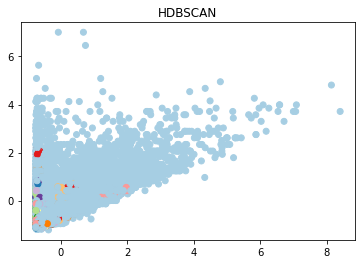

In [56]:
#Use pipeline
path='/content/drive/MyDrive/ML/cards.csv'
attributes=['BALANCE', 'BALANCE_FREQUENCY', 'CASH_ADVANCE','CASH_ADVANCE_FREQUENCY','CASH_ADVANCE_TRX','CREDIT_LIMIT', 'PAYMENTS','MINIMUM_PAYMENTS']
scale='minmax' #standard
#dimension_reduction= 'pca' #tsne
#components=2
model='HDBSCAN' #dbscan
eps=1.5
min_samples=12
build_pipeline(path, attributes, scale, components, model,eps, min_samples)

eps=1.5,min_samples=12. i am used hdbscan model from my observation balance vs credit limit its going linearly  from the visuals i am getting more number of cluster_labels. without reduction technique i am getting very less number of clusters.

In [ ]:
#With Dimension reduction technique using pipepline process

In [ ]:
#Build Pipeline in Machine Learning Process

In [39]:
#Define method for data exploration from the source
def data_exploration(path):
  df = pd.read_csv('/content/drive/MyDrive/ML/cards.csv') 
  df.head()
  return df

In [40]:
def missing_values(attributes):
  missing_col = df[attributes].copy()
  for i in missing_col:
    df.loc[df.loc[:,i].isnull(),i]=df.loc[:,i].mean()
  return missing_col,attributes

In [41]:
def data_preparation(attributes):
   
    X= df[attributes].copy()
    X.columns =['BALANCE', 'BALANCE_FREQUENCY', 'CASH_ADVANCE','CASH_ADVANCE_FREQUENCY','CASH_ADVANCE_TRX','CREDIT_LIMIT', 'PAYMENTS','MINIMUM_PAYMENTS']
    X.astype(float).head()
    return X,attributes

In [42]:
#Define method for data scaling
def data_scaling(X,scale,attributes):
  if scale=='minmax':
    scaler=MinMaxScaler()
  else:
    scaler=StandardScaler()
  scaled_values = scaler.fit_transform(X[attributes])
  return scaled_values

In [43]:
#Define method for data visualization
def data_visualization(X,attributes):
  plt.scatter(X[attributes[0]], X[attributes[5]])
  plt.show()

In [44]:
#Define method for feature reduction
def feature_reduction(scaled_values, dimension_reduction, components):
  if dimension_reduction == 'pca':
    values = PCA().fit_transform(scaled_values)[:, :components]
  elif dimension_reduction == 'tsne':
    values = TSNE(n_components=components).fit_transform(scaled_values)[:, :components]
  else:
    values = scaled_values
  return values

In [45]:
#Define method for model building

def build_model(model,min_samples,eps,values):
  if model=='DBSCAN':
    cluster = DBSCAN( eps=eps, min_samples=min_samples).fit_predict(values)
    #print(cluster)
  else:
    cluster = hdbscan.HDBSCAN(min_samples=min_samples).fit_predict(values)
    #print(cluster)
  return cluster

In [46]:
#Define method to visualize the clusters
def visualize_clusters(X, attributes, model,cluster):
 if model=='DBSCAN':
  plt.scatter(X[attributes[0]], X[attributes[5]],c=cluster, cmap='Paired')
  plt.title("DBSCAN")
  plt.show()
 else:
  plt.scatter(X[attributes[0]], X[attributes[5]],c=cluster, cmap='Paired')
  plt.title("HDBSCAN")
  plt.show()

In [47]:
#define the method to construct pipeline

def build_pipeline(path,attributes, scale, dimension_reduction, components, model,eps,min_samples):
 #Step 1
    df=data_exploration(path)
 #Step 2
    missing_values(attributes)

    X,attributes=data_preparation(attributes)
 
 #Step 3
    scaled_values=data_scaling(X,scale,attributes)
 
 #Step 4
    data_visualization(X,attributes)
 
 #Step 5
    values=feature_reduction(scaled_values, dimension_reduction, components)
 
 #Step 6
    cluster=build_model(model,min_samples,eps,values)
 
 #Step 7
    visualize_clusters(X, attributes, model,cluster)

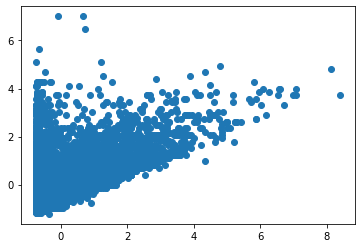

/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,


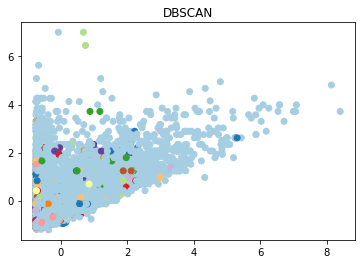

In [48]:
#Use pipeline
path='/content/drive/MyDrive/ML/cards.csv'
attributes=['BALANCE', 'BALANCE_FREQUENCY', 'CASH_ADVANCE','CASH_ADVANCE_FREQUENCY','CASH_ADVANCE_TRX','CREDIT_LIMIT', 'PAYMENTS','MINIMUM_PAYMENTS']
scale='minmax' #standard
dimension_reduction= 'tsne' #pca
components=2
model='DBSCAN' #dbscan
eps=0.1
min_samples=2
build_pipeline(path, attributes, scale, dimension_reduction, components, model,eps, min_samples)

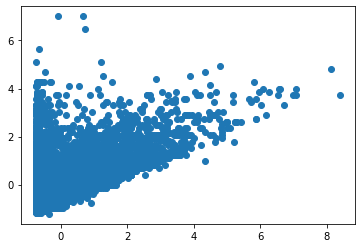

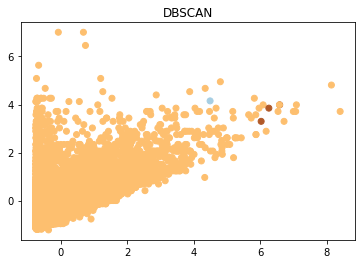

In [49]:
#Use pipeline
path='/content/drive/MyDrive/ML/cards.csv'
attributes=['BALANCE', 'BALANCE_FREQUENCY', 'CASH_ADVANCE','CASH_ADVANCE_FREQUENCY','CASH_ADVANCE_TRX','CREDIT_LIMIT', 'PAYMENTS','MINIMUM_PAYMENTS']
scale='minmax' #standard
dimension_reduction= 'pca' #pca
components=2
model='DBSCAN' #dbscan
eps=0.1
min_samples=2
build_pipeline(path, attributes, scale, dimension_reduction, components, model,eps, min_samples)

In [ ]:
Conclusion 

eps=1.5,min_samples=12. i am used t-distributed Stochastic Neighbor Embedding feature reduction or dimension reduction techniquedbscan modelfrom my observation balance vs credit limit its going linearly  from the visuals i am getting more number of cluster_labels

eps=1.5,min_samples=12. i used Principal component analysis feature reduction or dimension reduction technique dbscan modelfrom my observation balance vs credit limit its going linearly from the visuals i am getting more number of cluster_labels

**comparision**

**compare the 2 feature reduction technique t-distributed Stochastic Neighbor Embedding i am getting more number of clusters so t-sne technique is a best one**

**from my observation i used t-distributed Stochastic Neighbor Embedding feature reduction or dimension reduction technique is useful for  the this particular data set.For n_clusters = 6 The average silhouette_score is : 0.3498988290880023**